# Problem Statement

In [1]:
#import all modules
import numpy as np
import matplotlib.pyplot as plt
import math
from operator import mul
import seaborn as sns
from math import pow, factorial
from operator import mul

# Poisson random variable

A Poisson random variable models the number of events occurring in a fixed interval of time or space, given a constant average rate of occurrence.

The probability of observing exactly k events in the interval is given by:

$P(X = k) = \frac{e^{-\lambda} \cdot {\lambda^k}}{k!}$

**Where:**

- $P(X = k):$ Probability of k events occurring in the interval
- $λ:$ Average rate of occurrence of events
- $e:$ Euler's number (approximately 2.71828)


**Example:**

Suppose the average number of customers arriving at a store per hour is `5`. The probability of exactly 3 customers arriving in an hour can be calculated using the Poisson PMF:

$P(X = 3) = (e^{-5} · 5^{3}) / {3!}$

In [2]:
# poisson distribution
def poisson_pmf(Lambda, no_of_events):
    '''
    Arguments :
        Lambda(float, >0): the value of lambda
        no_of_events(int, 0 to inf): no of the events
    returns :
        probability(float, 0 to 1): probability of no_of_events occuring 
    '''
    probability = np.exp(-Lambda) * pow(Lambda, no_of_events) / factorial(no_of_events+1)

    return probability

# Binomial Random Variable

A binomial random variable models the number of successes in a fixed number of independent Bernoulli trials, each with a constant probability of success.

>The probability of getting exactly k successes in n trials is given by:

$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}$


Where:

- $P(X = k):$ Probability of k successes in `n` trials

- $\binom{n}{k}:$ Binomial coefficient, also denoted as `nCk` or `n` choose `k`, which represents the number of ways to choose `k` items from a set of `n` items.

- $p:$ Probability of success on a single trial

- $(1-p)^{n-k}:$ Probability of n-k failures

**Example:**

Consider flipping a coin 10 times. Let's say the probability of getting heads on a single flip is `p = 0.5`.

- P(X = 3): Probability of getting `3` heads in `10` flips = $\binom{1}{3} * 0.5^{3} * 0.5^{7}$

>The binomial random variable helps us understand and quantify the number of successes in a fixed number of independent trials.

In [3]:
import math

def get_binomial_prob(n: int, p: float, vals: list[int]) -> list[float]:
    """
    Calculates the binomial probability for a given set of values.

    Args:
        n (int): The number of trials.
        p (float): The probability of success on each trial.
        vals (list): A list of integer values representing the number of successes.

    Returns:
        list: A list of probabilities corresponding to the input values,
              where the probability at index i corresponds to the value at index i in the input list.

    Raises:
        ValueError: If the input probability `p` is not between 0 and 1, or if the input values contain non-integer or negative values,
                    or if the number of trials `n` is non-positive.

    Example:
        ```python
        probabilities = get_binomial_prob(10, 0.5, [2, 3, 4])
        print(probabilities)  # Output: [0.0439453125, 0.1171875, 0.205078125]
        ```
    """

    if not 0 < p < 1:
        raise ValueError("Probability p must be between 0 and 1.")
    if n <= 0:
        raise ValueError("Number of trials n must be positive.")
    

    probs = [math.comb(n, k) * p**k * (1-p)**(n-k) for k in vals]
    return probs

In [4]:
n= 10
p= 0.5
vals = range(1,11)
probs = get_binomial_prob(n, p, vals)

for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}")

P(X=1) = 0.009765625
P(X=2) = 0.0439453125
P(X=3) = 0.1171875
P(X=4) = 0.205078125
P(X=5) = 0.24609375
P(X=6) = 0.205078125
P(X=7) = 0.1171875
P(X=8) = 0.0439453125
P(X=9) = 0.009765625
P(X=10) = 0.0009765625


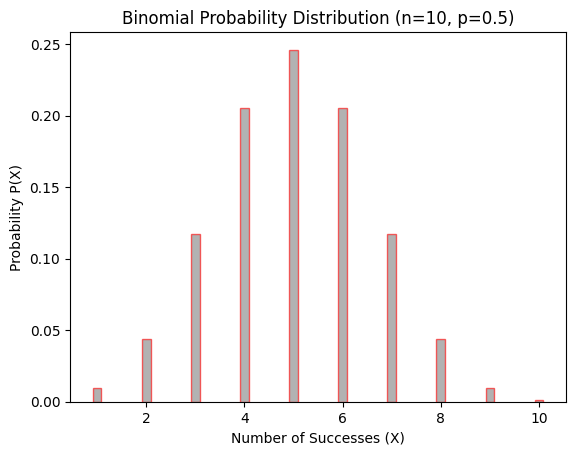

In [5]:
import matplotlib.pyplot as plt

plt.bar(vals, probs, color='gray', edgecolor='red', align='center', alpha=0.6, width=0.18)
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability P(X)")
plt.title("Binomial Probability Distribution (n=10, p=0.5)")
plt.show()

# Geometric Random variables

P(X=k)=(1−p)k−1p,k=1,2,3,... 

Where:

P(X=k):  Probability of the first success on the kth trial.

p:  Probability of success on a single trial

(1−p)(k−1):  Probability of  k−1  failures before the first success.

Example: Consider flipping a coin until you get heads. Let's say the probability of getting heads on a single flip is  p=0.5 .

P(X=1):  Probability of getting heads on the first flip = 0.5

P(X=2):  Probability of getting tails on the first flip and heads on the second = 0.5 * 0.5 = 0.25

P(X=3):  Probability of getting tails on the first two flips and heads on the third = 0.5 * 0.5 * 0.5 = 0.125

Applications:

Quality Control: Modeling the number of items inspected until a defective one is found.

Reliability Engineering: Modeling the time until a component fails. Sports: Modeling the number of attempts needed to score a goal or make a free throw.

Biology: Modeling the number of generations until a specific mutation occurs.

In essence, the geometric random ariable helps us understand and quantify the waiting time for a specific event to happen in a sequence of Bernoulli trials.

In [6]:
def calculate_geometric_prob(success_prob: float, trials: list[int]) -> list[float]:
    """
    Compute geometric probabilities for a given list of trial numbers.

    Args:
        success_prob (float): Probability of success in each trial (0 < success_prob < 1).
        trials (list[int]): List of positive integers, each representing the number of trials.

    Returns:
        list[float]: A list where each element corresponds to the geometric probability
                     for the respective trial count in the input list.

    Raises:
        ValueError: If `success_prob` is not within the range (0, 1),
                    or if the `trials` list contains invalid values (non-positive integers).

    Example:
        ```python
        result = calculate_geometric_prob(0.3, [1, 2, 3])
        print(result)  # Example output: [0.3, 0.21, 0.147]
        ```
    """
    # Validate the probability of success
    if success_prob <= 0 or success_prob >= 1:
        raise ValueError("The success probability must be in the range (0, 1).")

    

    # Calculate the geometric probabilities
    geometric_probs = [((1 - success_prob) ** (trial - 1)) * success_prob for trial in trials]

    return geometric_probs

In [7]:
p = 0.5
vals= range(1,11)
probs = calculate_geometric_prob(p, vals)

for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}")

P(X=1) = 0.5
P(X=2) = 0.25
P(X=3) = 0.125
P(X=4) = 0.0625
P(X=5) = 0.03125
P(X=6) = 0.015625
P(X=7) = 0.0078125
P(X=8) = 0.00390625
P(X=9) = 0.001953125
P(X=10) = 0.0009765625


C:\Users\Zubrist\AppData\Local\Temp\ipykernel_7916\3911845213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=probs, palette="viridis", edgecolor="black", width=0.5)


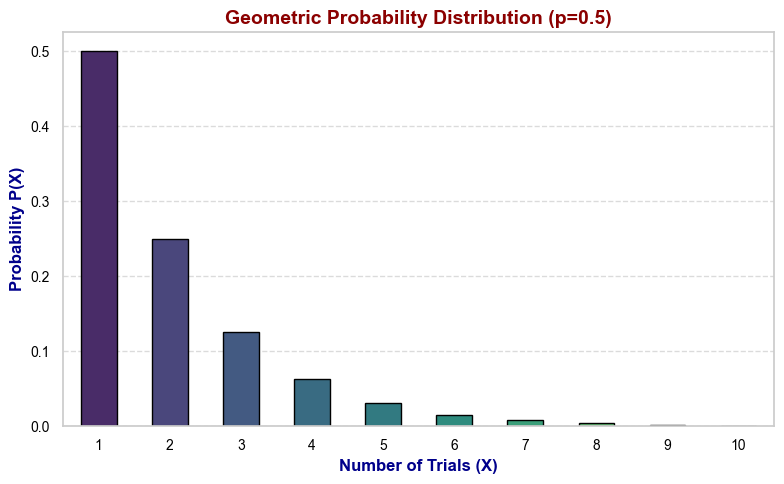

In [8]:
# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create the bar plot with Seaborn-like style
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.barplot(x=vals, y=probs, palette="viridis", edgecolor="black", width=0.5)

# Add labels and title
plt.xlabel("Number of Trials (X)", fontsize=12, weight='bold', color='darkblue')
plt.ylabel("Probability P(X)", fontsize=12, weight='bold', color='darkblue')
plt.title("Geometric Probability Distribution (p=0.5)", fontsize=14, weight='bold', color='darkred')

# Customize ticks for better readability
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Uniform Distribution  - By Shatarupa

A uniform distribution is a continuous random variable in which all values between a minimum value and a maximum value have the same probability.

$P(X = i ) =  \frac{1}{n} $

**Example:**

Consider rolling a fair six-sided die. The possible outcomes are` {1, 2, 3, 4, 5, 6}`. Each outcome is equally likely, so the probability of rolling any specific number is `1/6`.

This means:

- P(X = 1) = 1/6
- P(X = 2) = 1/6
- ...
- P(X = 6) = 1/6

In [9]:
# Function Definition

from fractions import Fraction

def get_uniform_prob(a: int, b: int, vals: list[int]) -> list[float]:
    """
    Calculates the uniform probability for a given set of values,
    discarding negative numbers and printing a message for them.

    Args:
        a (int): The lower bound of the uniform distribution.
        b (int): The upper bound of the uniform distribution.
        vals (list): A list of integer values.

    Returns:
        list: A list of probabilities corresponding to the input values.
    """
    if a > b:
        raise ValueError("Lower bound 'a' must be less than or equal to upper bound 'b'")

    prob = Fraction(1, b - a + 1)
    valid_probs = []

    for val in vals:
        if val < 0:
            print(f"'{val}' is not used as it is a negative number.")
        elif a <= val <= b:
            valid_probs.append(prob)
        else:
            print(f"'{val}' is not in between '{a}' and '{b}'.")

    return valid_probs



In [10]:
# Parameters and Output

# Parameters for uniform distribution
a = 1  # Lower bound
b = 6  # Upper bound
# vals = range(a, b+1) # Possible values of the uniform distribution
vals = [-2, 0, 1, 2, 3, 4, 5, 6, 8]  # Including negatives and out-of-range values

# Calculate probabilities
probs = get_uniform_prob(a, b, vals)
for val, prob in zip(vals, probs):
    if prob != 0:
        print(f"P(X={val}) = {prob}")
# Parameters


'-2' is not used as it is a negative number.
'0' is not in between '1' and '6'.
'8' is not in between '1' and '6'.
P(X=-2) = 1/6
P(X=0) = 1/6
P(X=1) = 1/6
P(X=2) = 1/6
P(X=3) = 1/6
P(X=4) = 1/6


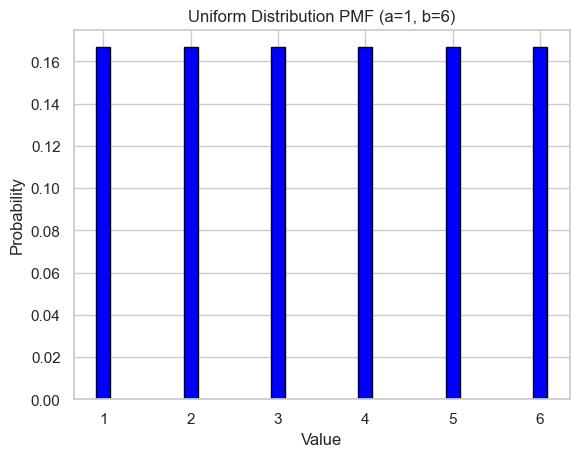

In [11]:
import matplotlib.pyplot as plt

# Filter only the valid values for plotting (1 through 6)
valid_vals = [val for val in vals if a <= val <= b]

# Plot only valid values and their probabilities
plt.bar(valid_vals, probs[:len(valid_vals)], color='blue', edgecolor='black', align='center', width=0.16)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Uniform Distribution PMF (a={}, b={})'.format(a, b))
plt.show()


# The controller function

In [12]:
def get_probability_distribution(distribution_name: str, params: dict, vals: list):
    """
    Compute probabilities based on the specified distribution and plot the result.

    Args:
        distribution_name (str): The name of the distribution ('poisson', 'binomial', 'geometric', or 'uniform').
        params (dict): The parameters required for the specified distribution.
        vals (list): A list of integer values representing input values for the distribution.

    Raises:
        ValueError: If the distribution name is invalid, if invalid parameters are provided, or if all values in `vals` are negative.
    """
    # Validate the distribution name
    valid_distributions = ["poisson", "binomial", "geometric", "uniform"]
    if distribution_name not in valid_distributions:
        raise ValueError(f"Invalid distribution name '{distribution_name}'. Valid options are: {valid_distributions}")

    # Remove negative values and print the removed negative values
    negative_vals = [val for val in vals if val < 0]
    positive_vals = [val for val in vals if val >= 0]

    if negative_vals:
        print("Negative numbers have been removed from the input values:", negative_vals)

    if not positive_vals:
        raise ValueError("All provided values are negative. Cannot proceed with calculations.")

    # Validate and filter values for uniform distribution
    if distribution_name == "uniform":
        a, b = params.get("a"), params.get("b")
        valid_vals = [val for val in positive_vals if a <= val <= b]
        if len(valid_vals) < len(positive_vals):
            print(f"Some values are not in between '{a}' and '{b}'.")
    else:
        valid_vals = positive_vals

    # Compute probabilities
    if distribution_name == "poisson":
        if "Lambda" not in params:
            raise ValueError("Missing required parameter 'Lambda' for Poisson distribution.")
        probabilities = [float(poisson_pmf(params["Lambda"], val)) for val in valid_vals]
    elif distribution_name == "binomial":
        if "n" not in params or "p" not in params:
            raise ValueError("Missing required parameters 'n' and 'p' for Binomial distribution.")
        probabilities = [float(prob) for prob in get_binomial_prob(params["n"], params["p"], valid_vals)]
    elif distribution_name == "geometric":
        if "success_prob" not in params:
            raise ValueError("Missing required parameter 'success_prob' for Geometric distribution.")
        probabilities = [float(prob) for prob in calculate_geometric_prob(params["success_prob"], valid_vals)]
    elif distribution_name == "uniform":
        if "a" not in params or "b" not in params:
            raise ValueError("Missing required parameters 'a' and 'b' for Uniform distribution.")
        probabilities = [float(prob) for prob in get_uniform_prob(params["a"], params["b"], valid_vals)]
    else:
        raise ValueError(f"Unsupported distribution '{distribution_name}'.")

    # Print the results
    print(f"Distribution: {distribution_name.capitalize()}")
    print("Input Values (filtered):", valid_vals)
    print("Probabilities:", probabilities)

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(valid_vals, probabilities, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"{distribution_name.capitalize()} Distribution")
    plt.xlabel("Values")
    plt.ylabel("Probability")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


Negative numbers have been removed from the input values: [-3, -5]
Distribution: Poisson
Input Values (filtered): [0, 1, 2, 4]
Probabilities: [0.049787068367863944, 0.07468060255179591, 0.07468060255179591, 0.033606271148308164]


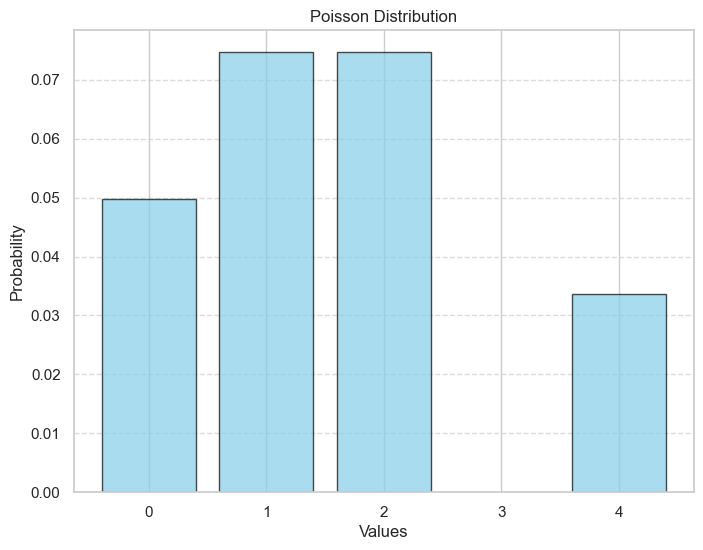

In [14]:
#Poisson Distribution

get_probability_distribution(
    "poisson",
    params={"Lambda": 3},
    #vals=range(-5,15)
    vals=[0, 1, 2, -3, 4, -5]
)

Negative numbers have been removed from the input values: [-1]
Distribution: Binomial
Input Values (filtered): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Probabilities: [0.0009765625, 0.009765625, 0.0439453125, 0.1171875, 0.205078125, 0.24609375, 0.205078125, 0.1171875, 0.0439453125, 0.009765625, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


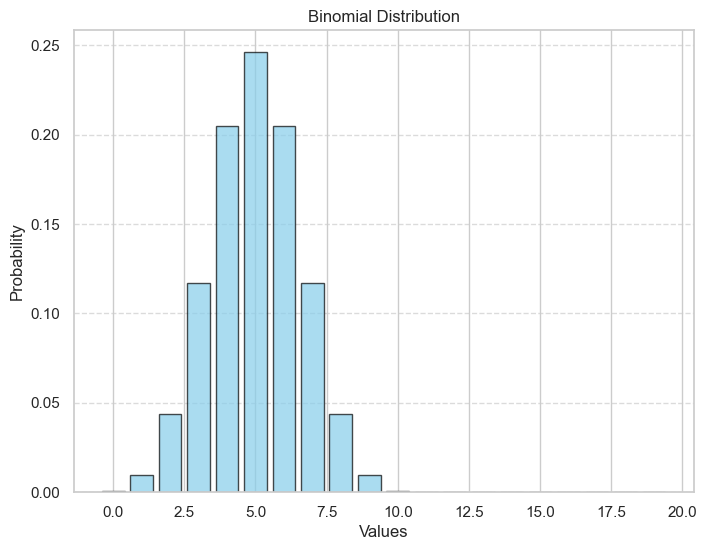

In [15]:
# Binomial Distribution

get_probability_distribution(
    "binomial",
    params={"n": 10, "p": 0.5},
    vals=range(-1,20) # does not mean anything after 10
    #vals=[2, 3, -4, 4, -7]
)

In [18]:
# Geometric Distribution

get_probability_distribution(
    "geometric",
    params={"success_prob": 0.3},
    #vals=range(-5,15)
    #vals=[1, 2, 3, -4, -7,10,21,11,14,16,22]
    vals=range(-5,-1)
)

Negative numbers have been removed from the input values: [-5, -4, -3, -2]


ValueError: All provided values are negative. Cannot proceed with calculations.

Negative numbers have been removed from the input values: [-1]
Some values are not in between '1' and '20'.
Distribution: Uniform
Input Values (filtered): [1, 2, 3, 4, 5]
Probabilities: [0.05, 0.05, 0.05, 0.05, 0.05]


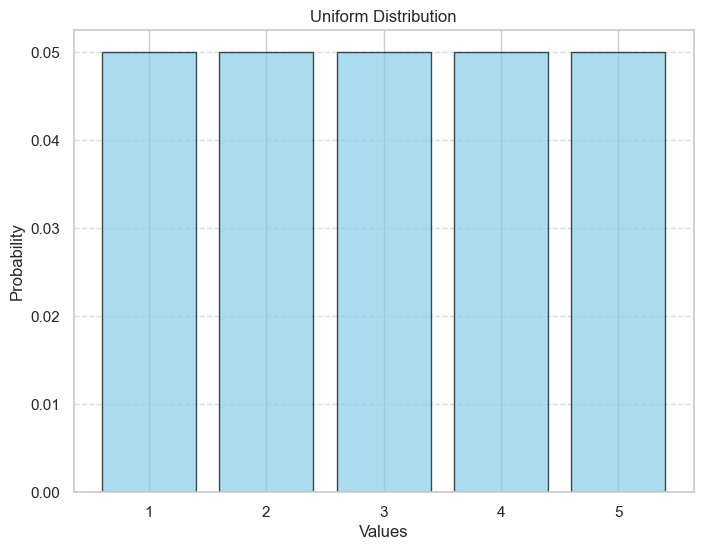

In [17]:
# Uniform Distribution

get_probability_distribution(
    "uniform",
    params={"a": 1, "b": 20},
    vals= range(-a,b)
    #vals=[1, 2, 6, -1, 4]
)